In [13]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src')
from actual.scm import read_system

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%%writefile car-full.conf
[equations]
# Parameters / Exogenous
# Delta_t=0.01        # time step (0.01-0.1 s)
# m=1500              # vehicle mass (1000-2000 kg)
# I_e=0.1             # engine inertia (0.1-1 kg m^2)
# I_c                 # torque converter inertia (0.1-0.5 kg m^2)
# G                   # gear ratio Int(2-10)
# F_d                 # driving force on car (0-5000 N, variable depends on throttle)
# F_b                 # braking force on car (0-8000 N, variable depends on brake input)
# R                   # total resistance (rolling + drag) (100-1000 N, variable, depends on velocity)
# T_e                 # engine torque (0-400 Nm, variable, throttle-controlled)
# T_c                 # torque from engine to converter (0-400 Nm, variable, depends on slip conditions)
# T_w                 # torque from converter to wheels (0-5000 Nm, variable, depends on transmission, converter slip)

Delta_t = 0.01               # time step [s], typically constant
m = 1500                     # mass [kg], typically constant
I_e = 0.3                    # engine inertia [kg·m²], typically constant
I_c = 0.2                    # torque converter inertia [kg·m²], typically constant
G = 4                        # gear ratio, typically fixed per gear
r_wheel = 0.3                # wheel radius [m], typically constant
c_rr = 0.015                 # rolling resistance coefficient, constant
rho_air = 1.225              # air density [kg/m³], constant
Cd = 0.3                     # drag coefficient, constant
A_front = 2.2                # frontal area [m²], constant
g = 9.81                     # gravitational acceleration [m/s²], constant

T_e_max=400                  # [N.m]
F_b_max=8000                 # [N.m]
K_c=30                       # [N.m.s/rad]

throttle = u_throttle        # throttle input [0–1], exogenous variable
brake = u_brake              # brake input [0–1], exogenous variable

# Engine torque (depends directly on throttle input)
T_e = throttle * T_e_max           # T_e_max ≈ 400 Nm

# Slip between engine and converter (angular velocities)
converter_slip = omega_e - omega_c

# Torque from engine into converter, simple slip-based model
T_c = K_c * converter_slip         # K_c is torque converter stiffness constant (e.g., 20–50 Nm·s/rad)

# Torque transmitted from converter to wheels (through gear ratio)
T_w = T_c * G

# Driving force at wheels (from wheel torque)
F_d = T_w / r_wheel

# Aerodynamic drag force (depends on velocity squared)
F_drag = 0.5 * rho_air * Cd * A_front * V**2

# Rolling resistance force (depends linearly on velocity)
F_roll = c_rr * m * g

# Total resistance force (rolling + aerodynamic)
R = F_drag + F_roll

# Braking force (depends directly on brake input, scaled to max brake force)
F_b = brake * F_b_max               # F_b_max ≈ 8000 N


# State Updates
# x_{t+1}         = x_t + V_t * Delta_t
# V_{t+1}         = V_t + (Delta_t / m) * (F_d - F_b - R)
# omega_{e,t+1}   = omega_{e,t} + (Delta_t / I_e) * (T_e - T_c)
# omega_{c,t+1}   = omega_{c,t} + (Delta_t / I_c) * (T_c - T_w / G)

# Position update (linear motion)
x_next = x + V * Delta_t

# Velocity update (Newton’s law)
V_next = V + (Delta_t / m) * (F_d - F_b - R)

# Engine angular velocity update
omega_e_next = omega_e + (Delta_t / I_e) * (T_e - T_c)

# Torque converter angular velocity update
omega_c_next = omega_c + (Delta_t / I_c) * (T_c - T_w / G)


[domains]
omega_e_next: Int(0,10)
T_w: Int(0,10)
omega_c_next: Int(0,10)
brake: Int(0,10)
T_c: Int(0,10)
F_d: Int(0,10)
throttle: Int(0,10)
T_e: Int(0,10)
x_next: Int(0,10)
V_next: Int(0,10)
F_roll: Int(0,10)
F_drag: Int(0,10)
R: Int(0,10)
converter_slip: Int(0,10)
F_b: Int(0,10)

Writing car-full.conf


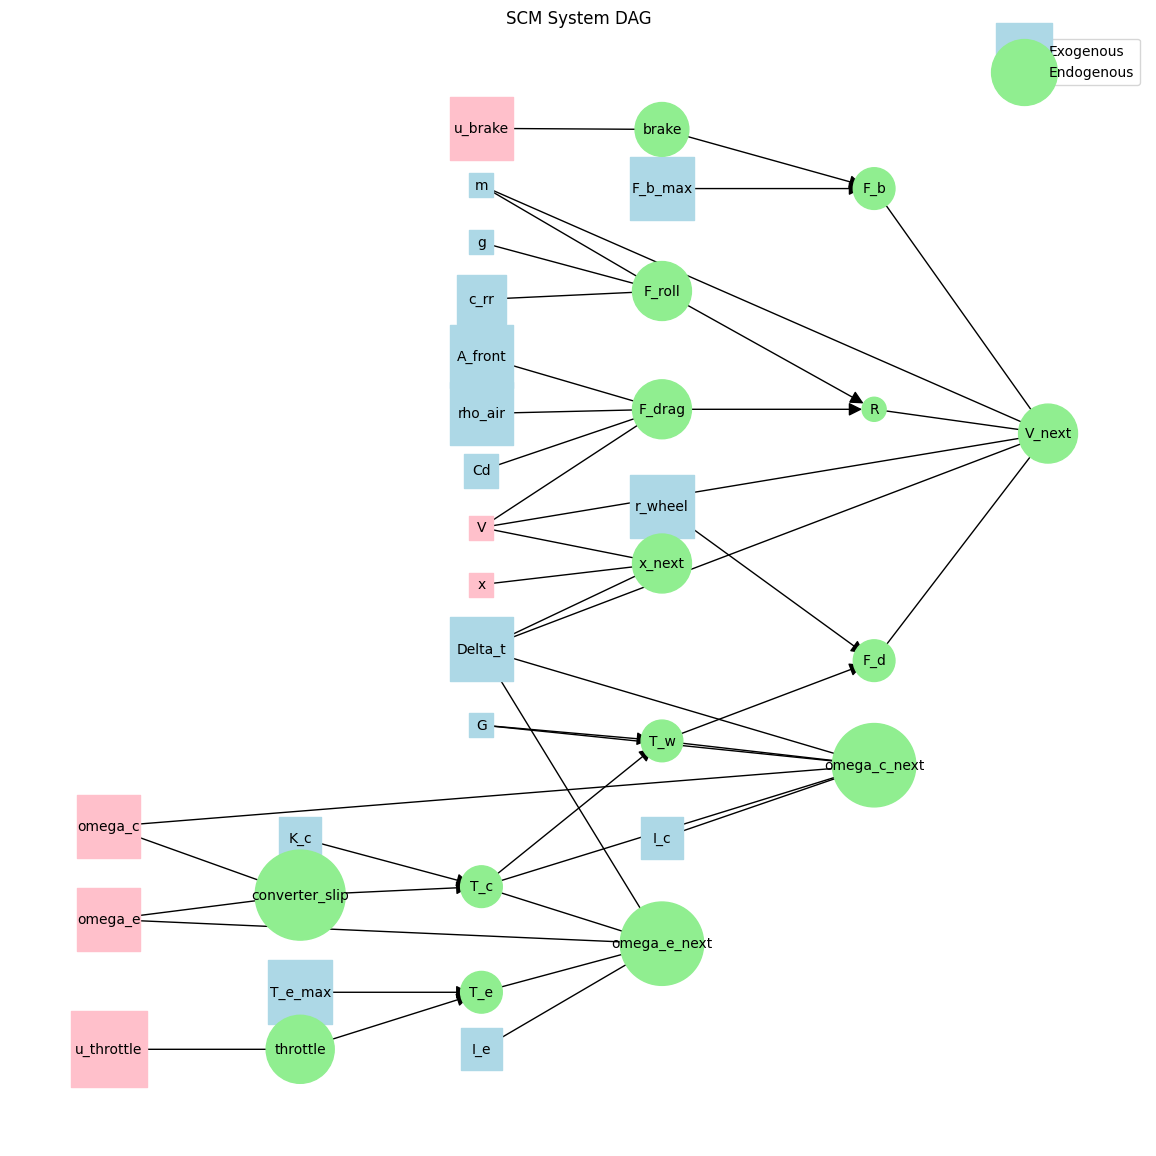

In [33]:
system = read_system('car-full.conf')
system.display_dag()

In [62]:
%%writefile car-small.conf
[equations]
# Parameters / Exogenous
# Delta_t=0.01        # time step (0.01-0.1 s)
# m=1500              # vehicle mass (1000-2000 kg)
# I_e=0.1             # engine inertia (0.1-1 kg m^2)
# I_c                 # torque converter inertia (0.1-0.5 kg m^2)
# G                   # gear ratio Int(2-10)
# F_d                 # driving force on car (0-5000 N, variable depends on throttle)
# F_b                 # braking force on car (0-8000 N, variable depends on brake input)
# R                   # total resistance (rolling + drag) (100-1000 N, variable, depends on velocity)
# T_e                 # engine torque (0-400 Nm, variable, throttle-controlled)
# T_c                 # torque from engine to converter (0-400 Nm, variable, depends on slip conditions)
# T_w                 # torque from converter to wheels (0-5000 Nm, variable, depends on transmission, converter slip)

Delta_t = 0.01               # time step [s], typically constant
m = 1500                     # mass [kg], typically constant
# I_e = 0.3                    # engine inertia [kg·m²], typically constant
# I_c = 0.2                    # torque converter inertia [kg·m²], typically constant
G = 4                        # gear ratio, typically fixed per gear
r_wheel = 0.3                # wheel radius [m], typically constant
# c_rr = 0.015                 # rolling resistance coefficient, constant
# rho_air = 1.225              # air density [kg/m³], constant
# Cd = 0.3                     # drag coefficient, constant
# A_front = 2.2                # frontal area [m²], constant
# g = 9.81                     # gravitational acceleration [m/s²], constant

# T_e_max=400                  # [N.m]
F_b_max=8000                 # [N.m]
K_c=30                       # [N.m.s/rad]

# throttle = u_throttle        # throttle input [0–1], exogenous variable
brake = u_brake              # brake input [0–1], exogenous variable

# Engine torque (depends directly on throttle input)
# T_e = throttle * T_e_max           # T_e_max ≈ 400 Nm

# Slip between engine and converter (angular velocities)
# converter_slip = omega_e - omega_c
converter_slip = u_throttle

# Torque from engine into converter, simple slip-based model
T_c = K_c * converter_slip         # K_c is torque converter stiffness constant (e.g., 20–50 Nm·s/rad)

# Torque transmitted from converter to wheels (through gear ratio)
T_w = T_c * G

# Driving force at wheels (from wheel torque)
F_d = T_w / r_wheel

# Aerodynamic drag force (depends on velocity squared)
# F_drag = 0.5 * rho_air * Cd * A_front * V**2

# Rolling resistance force (depends linearly on velocity)
# F_roll = c_rr * m * g

# Total resistance force (rolling + aerodynamic)
# R = F_drag + F_roll

# Braking force (depends directly on brake input, scaled to max brake force)
F_b = brake * F_b_max               # F_b_max ≈ 8000 N


# State Updates
# x_{t+1}         = x_t + V_t * Delta_t
# V_{t+1}         = V_t + (Delta_t / m) * (F_d - F_b - R)
# omega_{e,t+1}   = omega_{e,t} + (Delta_t / I_e) * (T_e - T_c)
# omega_{c,t+1}   = omega_{c,t} + (Delta_t / I_c) * (T_c - T_w / G)

# Position update (linear motion)
# x_next = x + V * Delta_t

# Velocity update (Newton’s law)
V_next = V + (Delta_t / m) * (F_d - F_b - R)

# Engine angular velocity update
# omega_e_next = omega_e + (Delta_t / I_e) * (T_e - T_c)

# Torque converter angular velocity update
# omega_c_next = omega_c + (Delta_t / I_c) * (T_c - T_w / G)


[domains]
omega_e_next: Int(0,10)
T_w: Int(0,10)
omega_c_next: Int(0,10)
brake: Int(0,10)
T_c: Int(0,10)
F_d: Int(0,10)
throttle: Int(0,10)
T_e: Int(0,10)
x_next: Int(0,10)
V_next: Int(0,10)
F_roll: Int(0,10)
F_drag: Int(0,10)
R: Int(0,10)
converter_slip: Int(0,10)
F_b: Int(0,10)
u_throttle: Int(0,10)
u_brake: Int(0,10)
V: Int(0,10)


Overwriting car-small.conf


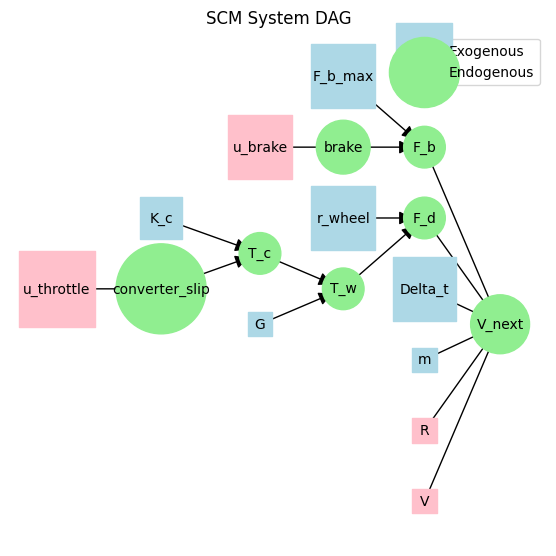

In [63]:
system = read_system('car-small.conf')
system.display_dag()

In [44]:
# for full
# state = system.get_state({'u_throttle': 10, 'u_brake': 1, 'x': 0, 'V': 1, 'omega_c': 1, 'omega_e': 1})

# for small
state = system.get_state({'u_throttle': 10, 'u_brake': 1, 'V': 1, 'R': 1})

state

{'u_throttle': 10,
 'u_brake': 1,
 'V': 1,
 'R': 1,
 'F_b_max': 8000,
 'K_c': 30,
 'Delta_t': 0.01,
 'm': 1500,
 'G': 4,
 'r_wheel': 0.3,
 'converter_slip': 10,
 'brake': 1,
 'T_c': 300,
 'F_b': 8000,
 'T_w': 1200,
 'F_d': 4000.0,
 'V_next': 0.9733266666666667}

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 34494.33it/s]


(array([ 97., 104.,  96.,  88.,  99., 119., 112.,  81.,  93., 111.]),
 array([-0.53334667,  0.522386  ,  1.57811867,  2.63385133,  3.689584  ,
         4.74531667,  5.80104933,  6.856782  ,  7.91251467,  8.96824733,
        10.02398   ]),
 <BarContainer object of 10 artists>)

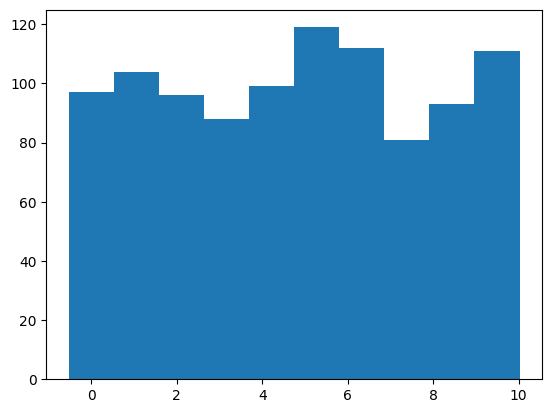

In [65]:
from matplotlib import pyplot as plt
from tqdm import tqdm

Vs = []
for i in tqdm(range(1000)):
    context = system.get_random_context()
    state = system.get_state(context)
    Vs.append(state['V_next'])

plt.hist(Vs)    

In [ ]:
# serial
# from actual.hp_modified import find_all_causes
# from tqdm import tqdm

# ac2_times, ac3_times = [], []
# for i in tqdm(range(10)):
#     context = get_random_context()
#     state = system.get_state(context)
#     results = find_all_causes(system, context, 'V_next', state['V_next'])
#     ac2_times.append(results['ac2_time'])
#     ac3_times.append(results['ac3_time'])

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm
from actual.hp_modified import find_all_causes

THR = 3
# Function to execute in parallel
def process_iteration():
    while True:
        context = system.get_random_context()
        state = system.get_state(context)
        if state['V_next'] <= THR:
            break
    
    a_results = find_all_causes(system, context, 'V_next', '<=', THR)
    a_results['context'] = context
    return a_results


a = process_iteration()
# Number of iterations
num_iterations = 3

# Run in parallel
# results = Parallel(n_jobs=-1)(
#     delayed(process_iteration)() for i in tqdm(range(num_iterations))
# )

# Unpacking results
ac2_times = [r['ac2_time'] for r in results]
ac3_times = [r['ac3_time'] for r in results]

# Convert to lists (if needed)
ac2_times = list(ac2_times)
ac3_times = list(ac3_times)

# Print results (Optional)
print("AC2 Times:", ac2_times)
print("AC3 Times:", ac3_times)

KeyboardInterrupt: 

In [ ]:
results

[{'ac2_time': 0.0006666183471679688,
  'ac3_time': 6.794929504394531e-05,
  'results': []},
 {'ac2_time': 0.0005924701690673828,
  'ac3_time': 2.9802322387695312e-05,
  'results': []},
 {'ac2_time': 0.0002791881561279297,
  'ac3_time': 2.6464462280273438e-05,
  'results': []}]

Text(0.5, 1.0, 'AC3 times (s)')

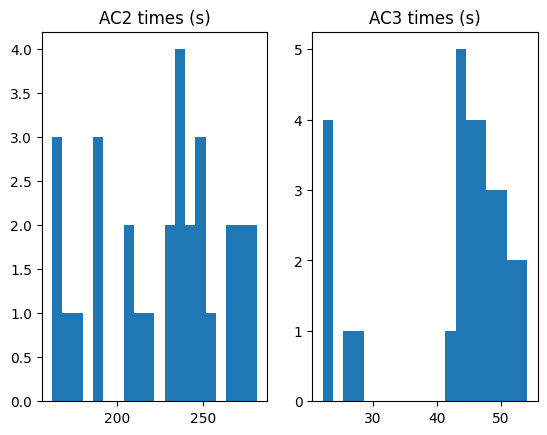

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1,2)
ax[0].hist(ac2_times, bins=20)
ax[0].set_title('AC2 times (s)')

ax[1].hist(ac3_times, bins=20)
ax[1].set_title('AC3 times (s)')